In [2]:
import torch

In [3]:
x = torch.empty(1)
print("empty(1):", x)
x = torch.empty(3)
print("empty(3):", x)
x = torch.empty(2,3)
print("empty(2,3):", x)

empty(1): tensor([-1.0507e+09])
empty(3): tensor([1.7110e+23, 3.1891e-41, 3.6797e-22])
empty(2,3): tensor([[3.6797e-22, 4.3858e-41, 1.7288e+23],
        [3.1891e-41, 4.4842e-44, 0.0000e+00]])


In [4]:
x = torch.rand(5,3)
print("rand(5,3):", x)

rand(5,3): tensor([[0.5712, 0.6594, 0.6083],
        [0.8231, 0.0805, 0.3275],
        [0.6380, 0.9175, 0.1218],
        [0.3703, 0.0160, 0.0411],
        [0.3165, 0.0218, 0.0904]])


In [5]:
x.size()

torch.Size([5, 3])

In [6]:
x.shape

torch.Size([5, 3])

In [7]:
# check data type
print(x.dtype)

# specify types, float default
x = torch.zeros(5,3, dtype=torch.float16)
print(x)

print(x.dtype)


torch.float32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)
torch.float16


In [8]:
x = torch.tensor([5.5, 3], requires_grad=True)
print(x)

tensor([5.5000, 3.0000], requires_grad=True)


In [9]:
x = torch.ones(2,2)
y = torch.rand(2,2)
z = x+y

print(x)
print(y)
print(z)

tensor([[1., 1.],
        [1., 1.]])
tensor([[0.6414, 0.1575],
        [0.0098, 0.2093]])
tensor([[1.6414, 1.1575],
        [1.0098, 1.2093]])


In [10]:
torch.add(x,y)

tensor([[1.6414, 1.1575],
        [1.0098, 1.2093]])

In [11]:
# trailing underscore is an inplace operation
y.add_(x)

tensor([[1.6414, 1.1575],
        [1.0098, 1.2093]])

In [12]:
y

tensor([[1.6414, 1.1575],
        [1.0098, 1.2093]])

In [13]:
torch.add(x,y)

tensor([[2.6414, 2.1575],
        [2.0098, 2.2093]])

In [14]:
# elementwise division
z = torch.div(x, y)
print(z)

tensor([[0.6092, 0.8639],
        [0.9903, 0.8269]])


In [15]:
# since x and yo both are tensors simple division also does the elementwise division
x/y

tensor([[0.6092, 0.8639],
        [0.9903, 0.8269]])

In [16]:
# slicing
x = torch.rand(5,3)
print(x)
print("x[:, 0]: ", x[:, 0]) #all rows, column 0
print("x[1, :]: ", x[1, :]) #row 1 all columns
print("x[2, 2]: ", x[2,2]) #element at 2,2

tensor([[0.6560, 0.2637, 0.6078],
        [0.6524, 0.1228, 0.0198],
        [0.3818, 0.8111, 0.6194],
        [0.5633, 0.3616, 0.6084],
        [0.4592, 0.3516, 0.2769]])
x[:, 0]:  tensor([0.6560, 0.6524, 0.3818, 0.5633, 0.4592])
x[1, :]:  tensor([0.6524, 0.1228, 0.0198])
x[2, 2]:  tensor(0.6194)


In [17]:
# get the actual value if only one element in your tensor
print("x[1,1].item()", x[2,2].item())

x[1,1].item() 0.6193615198135376


In [18]:
# reshape
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1,8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [19]:
w = x.view(8, -1)
print(w.size())

torch.Size([8, 2])


# Numpy - convert Torch tensor to Numpy arrar and vice versa


In [20]:
a = torch.ones(5)
print(a)

b = a.numpy()
print(b)
print(type(b))

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [21]:
# if the tensor is on the CPU, both objects will share the same memory location and so, changing one will also change the other
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [22]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)  #shares the memory location with a
c = torch.tensor(a)     #creates an actual copy
print(a)
print(b)
print(c)

a += 1
print(a)
print(b)
print(c)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


# GPU Support
By default all tensors are created on the CPU. But we can also move them to the GPU (if it's available), or create them directly on the GPU.

In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x = torch.rand(2,2).to(device)

x = torch.rand(2,2, device=device)  #directly create tensors on GPU

In [24]:
device = x.get_device()
print(device)

0


# AutoGrad

In [25]:
import torch

x = torch.randn(3, requires_grad = True)
y = x+2

print(x)
print(y)
print(y.grad_fn)

tensor([ 1.1583,  0.6542, -0.3432], requires_grad=True)
tensor([3.1583, 2.6542, 1.6568], grad_fn=<AddBackward0>)


In [26]:
# do more operations on y
z = y*y*3
print(z)
z = z.mean()
print(z)

tensor([29.9251, 21.1347,  8.2345], grad_fn=<MulBackward0>)
tensor(19.7648, grad_fn=<MeanBackward0>)


In [27]:
print(x.grad)
z.backward()
print(x.grad)    #dz/dx

None
tensor([6.3167, 5.3084, 3.3135])


# Gradient Descent Autograd

In [28]:
x = torch.tensor([1,2,3,4,5,6,7,8],dtype=torch.float32)
y = torch.tensor([2,4,6,8,10,12,14,16],dtype=torch.float32, requires_grad=True)
w = torch.tensor(0.0, dtype = torch.float32, requires_grad=True)

# model output
def forward(x):
  return w*x

def loss(y, y_pred):
  return ((y_pred-y)**2).mean()

X_test = 5.0

print(f"prediction before training: f({X_test})={forward(X_test).item():.3f}")

prediction before training: f(5.0)=0.000


In [29]:
# Training
learning_rate = 0.01
n_epochs = 100

for epoch in range(n_epochs):
  # predict = forward pass
  y_pred = forward(x)

  # loss
  l = loss(y, y_pred)

  # calculate gradients - backward pass
  l.backward()

  # update weights
  with torch.no_grad():
    w -= learning_rate * w.grad

  w.grad.zero_()

  if (epoch+1) % 10 == 0:
    print(f"epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.3f}")

print(f"predictions after training: f({X_test}) = {forward(X_test).item():.3f}")





epoch 10: w = 1.998, loss = 0.000
epoch 20: w = 2.000, loss = 0.000
epoch 30: w = 2.000, loss = 0.000
epoch 40: w = 2.000, loss = 0.000
epoch 50: w = 2.000, loss = 0.000
epoch 60: w = 2.000, loss = 0.000
epoch 70: w = 2.000, loss = 0.000
epoch 80: w = 2.000, loss = 0.000
epoch 90: w = 2.000, loss = 0.000
epoch 100: w = 2.000, loss = 0.000
predictions after training: f(5.0) = 10.000


# Model, Loss & Optimizer

In [30]:
import torch
import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4], [5], [6], [7], [8]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8], [10], [12], [14], [16]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f"n_samples = {n_samples}, n_features = {n_features}")

X_test = torch.tensor([5], dtype=torch.float32)

n_samples = 8, n_features = 1


In [31]:
# design the model, the model has to implement the forward pass
# here we could simply use a built in model from pytorch
# model = nn.Linear(input_size, output_size)

# a pytorch model class always inherits from nn.Module
class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    # define different layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

input_size, output_size = n_features, n_features
model = LinearRegression(input_size, output_size)

print(f"prediction before training: f({X_test.item()}) = {model(X_test).item():.3f}")

# define loss and optimizer
learning_rate = 0.01
n_epochs = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(n_epochs):
  # predict = forward pass
  y_predicted = model(X)

  l = loss(Y, y_predicted)

  # calculate gradients = backward pass
  l.backward()

  # update weights
  optimizer.step()

  # zero the gradients after updating
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    w, b = model.parameters()
    print(f"epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l.item():.3f}")

print(f"prediction after training: f({X_test.item()}) = {model(X_test).item():.3f}")


prediction before training: f(5.0) = -2.711
epoch 10: w = 1.836, loss = 0.175
epoch 20: w = 1.843, loss = 0.161
epoch 30: w = 1.849, loss = 0.149
epoch 40: w = 1.855, loss = 0.137
epoch 50: w = 1.861, loss = 0.127
epoch 60: w = 1.866, loss = 0.117
epoch 70: w = 1.872, loss = 0.108
epoch 80: w = 1.877, loss = 0.100
epoch 90: w = 1.882, loss = 0.092
epoch 100: w = 1.886, loss = 0.085
prediction after training: f(5.0) = 10.071


# First Neural Net
GPU, Datasets, DataLoader, Transforms, Neural Net, Training & Evaluation

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 13002759.15it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 350891.15it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3226968.94it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10601295.92it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



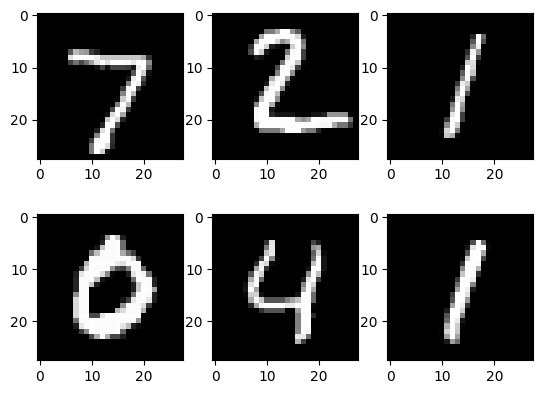

In [32]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train = True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train = False,
                                          transform=transforms.ToTensor())

# Data Loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [34]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    # no activation and no softmax at the end
    return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
crieterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # Forward pass and loss calculation
    outputs = model(images)
    loss = crieterion(outputs, labels)

    # Backward and optimize
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (i+1) % 10 == 0:
      print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")


epoch 1/2, step 10/600, loss = 1.4997
epoch 1/2, step 20/600, loss = 0.8063
epoch 1/2, step 30/600, loss = 0.5171
epoch 1/2, step 40/600, loss = 0.5344
epoch 1/2, step 50/600, loss = 0.3752
epoch 1/2, step 60/600, loss = 0.2221
epoch 1/2, step 70/600, loss = 0.3227
epoch 1/2, step 80/600, loss = 0.4653
epoch 1/2, step 90/600, loss = 0.3757
epoch 1/2, step 100/600, loss = 0.2791
epoch 1/2, step 110/600, loss = 0.2893
epoch 1/2, step 120/600, loss = 0.3341
epoch 1/2, step 130/600, loss = 0.2847
epoch 1/2, step 140/600, loss = 0.2896
epoch 1/2, step 150/600, loss = 0.2093
epoch 1/2, step 160/600, loss = 0.5174
epoch 1/2, step 170/600, loss = 0.1720
epoch 1/2, step 180/600, loss = 0.1820
epoch 1/2, step 190/600, loss = 0.2100
epoch 1/2, step 200/600, loss = 0.4183
epoch 1/2, step 210/600, loss = 0.2540
epoch 1/2, step 220/600, loss = 0.1358
epoch 1/2, step 230/600, loss = 0.1386
epoch 1/2, step 240/600, loss = 0.3540
epoch 1/2, step 250/600, loss = 0.1973
epoch 1/2, step 260/600, loss = 0.

In [36]:
# Test the model: we don't need to compute gradients
with torch.no_grad():
  n_correct = 0
  n_samples = len(test_loader.dataset)

  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)

    # max returns (output_value, index)
    _, predicted = torch.max(outputs, 1)
    n_correct += (predicted == labels).sum().item()

  acc = n_correct / n_samples
  print(f"Accuract of the network on the {n_samples} test images: {100*acc} %")

Accuract of the network on the 10000 test images: 97.1 %


# CNN

Files already downloaded and verified
Files already downloaded and verified


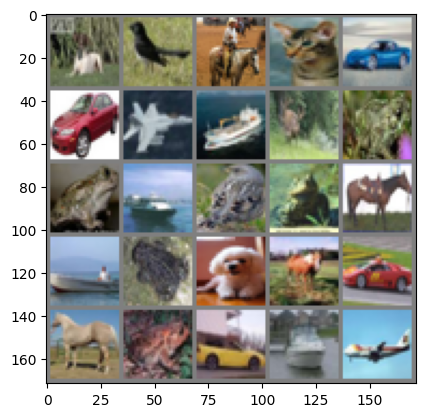

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# device configutration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_epochs = 10
batch_size = 32
learning_rate = 0.001

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
def imshow(imgs):
  imgs = imgs / 2 + 0.5
  npimgs = imgs.numpy()
  plt.imshow(np.transpose(npimgs, (1,2,0)))
  plt.show()

# one batch of random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imshow(img_grid)


In [ ]:
# model class
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = conv2d(3,32,3)